In [9]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


# Exemple construction et entrainement d'un modèle NN de régression avec Keras (TF 2.x)

Nous voulons travailler sur le dataset "boston housing" pour construire un modèle de régression capable de prédire le prix de logements dans la ville de Boston à partir de 13 attributes numériques du bien immobilier.

13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$). Variables in order:
 
 * CRIM     per capita crime rate by town
 * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS    proportion of non-retail business acres per town
 * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * NOX      nitric oxides concentration (parts per 10 million)
 * RM       average number of rooms per dwelling
 * AGE      proportion of owner-occupied units built prior to 1940
 * DIS      weighted distances to five Boston employment centres
 * RAD      index of accessibility to radial highways
 * TAX      full-value property-tax rate per 10,000 dollars
 * PTRATIO  pupil-teacher ratio by town
 * B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 * LSTAT    percentage lower status of the population
 * MEDV     Median value of owner-occupied homes in k$

### Données

In [10]:
# import dataset (spécifique au dataset, ici on utilise un dataset disponible par défaut dans Keras)

dataset = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = dataset.load_data(test_split=0.2)

# nous avons importé données et labels d'entrainement et de test

In [11]:
# rescale data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(x_train)

# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

### Création du modèle (architecture NN)

Construire un modèle avec l'architecture suivante:
* en entrée les 13 variables numériques du dataset
* une première couche dense avec 8 néurones et activation ReLU
* une deuxième couche dense avec 16 néurones et activation ReLU
* une couche finale dense de régréssion

Pour çela, utilisez votre API keras préférée (sequential ou functional)

In [12]:
# construction du modèle de regréssion pour l'estimation de prix

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, activation='relu', input_shape=[X_train_scaled.shape[1]]),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1)
])

2021-11-13 16:29:31.721779: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-13 16:29:31.721902: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-13 16:29:31.724378: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-DMWORK): /proc/driver/nvidia/version does not exist
2021-11-13 16:29:31.750352: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# autre option sequentiel
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(8, activation='relu', input_shape=[X_train_scaled.shape[1]]))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [14]:
# functional api
inp = tf.keras.layers.Input(shape=[X_train_scaled.shape[1]])
x = tf.keras.layers.Dense(8, activation='relu')(inp)
x = tf.keras.layers.Dense(16, activation='relu')(x)
out = tf.keras.layers.Dense(1)(x)

model = tf.keras.models.Model(inputs=[inp,], outputs=[out])

Compiler le modèle avec optimiseur "rmsprop".
Pour la lossfunction, utiliser l'erreur moindre carrés (car il s'agit d'un modèle de regéssion), et utiliser comme métrique de performance le "mean absolute error". 

In [15]:
#compile model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

### Entrainement du modèle

Entrainer le modèle sur le jeu d'entrainement pendant 100 epochs. utiliser le 20% de ces données en tant que données de validation

In [16]:
# train model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
11/11 [==============================] - 4s 48ms/step - loss: 552.1419 - mae: 21.7568 - val_loss: 620.4465 - val_mae: 23.2718
Epoch 2/100
11/11 [==============================] - 0s 12ms/step - loss: 541.1337 - mae: 21.5090 - val_loss: 610.9467 - val_mae: 23.0706
Epoch 3/100
11/11 [==============================] - 0s 18ms/step - loss: 531.4337 - mae: 21.2965 - val_loss: 601.0385 - val_mae: 22.8624
Epoch 4/100
11/11 [==============================] - 0s 17ms/step - loss: 521.3623 - mae: 21.0751 - val_loss: 590.2405 - val_mae: 22.6342
Epoch 5/100
11/11 [==============================] - 0s 18ms/step - loss: 510.3867 - mae: 20.8327 - val_loss: 578.7880 - val_mae: 22.3897
Epoch 6/100
11/11 [==============================] - 0s 19ms/step - loss: 498.9777 - mae: 20.5748 - val_loss: 567.8013 - val_mae: 22.1426
Epoch 7/100
11/11 [==============================] - 0s 24ms/step - loss: 487.5367 - mae: 20.3060 - val_loss: 554.0139 - val_mae: 21.8416
Epoch 8/100
11/11 [===============

### visualisation de l'entrainement

In [17]:
import matplotlib.pyplot as plt

In [18]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


visualiser l'histoire de la métrique de précision mae au cours de l'entrainement, comparer données entrainement et validation

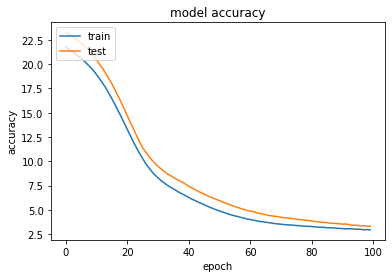

In [19]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

visualiser l'histoire de la loss au cours de l'entrainement, comparer données entrainement et validation

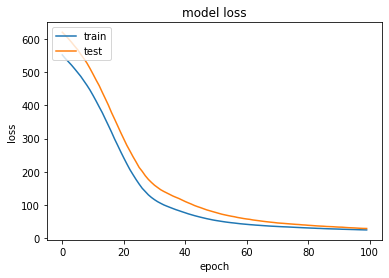

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### évaluation du modèle entrainé

évaluer le modèle sur le jeu de test. Est-ce que le nivéau de précision obtenu est comparable à celui du jeu d'entrainement?

In [21]:
model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 22.6546 - mae: 3.6987


[22.654645919799805, 3.6987013816833496]

### Utilisation du modèle entrainé

utiliser le modèle entrainé pour prédire le prix du bien immobilier contenu dans les premières 5 instances du jeu de test, et comparer les prix obtenus avec les prix réels des mêmes logements. Que peut on dire sur la qualité de la prédiction?

In [22]:
# we get a sample data (the first 2 inputs from the training data)
to_predict = X_test_scaled[:2]
# we call the predict method
predictions = model.predict(to_predict)
# print the predictions
print(predictions)
# output
# array([[13.272537], [39.808475]], dtype=float32)
# print the real values
print(y_test[:2])
# array([15.2, 42.3])

[[10.845831]
 [16.381897]]
[ 7.2 18.8]


# Implémentation Bonus

Pour les experts ou ceux qui veulent maîtriser le procès d'entraînement, dans cette implémentation différente du même exercice vous allez voir comment:
* utiliser le subclassing pour créer l'architecture du modèle (pas toujours nécessaire)
* utiliser un training loop customisé pour l'entrainement
* utiliser du decorateur tf.function pour accélerer la fonction d'entrainement

### données

utiliser la fonctionnalité "tf.data.Dataset.from_tensor_slices" pour la création automatique de batches de données

In [23]:
# use tf.data to manage dataset, shuffle and create batches
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train_scaled, y_train.reshape(y_train.shape[0],1))).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test.reshape(y_test.shape[0],1))).batch(32)

### modèle

utiliser le model subclassing pour la création de la même architecture NN

In [24]:
# create model, for exemple with model subclassing

class MyModel(tf.keras.models.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = tf.keras.layers.Dense(8, activation='relu')
        self.d2 = tf.keras.layers.Dense(16, activation='relu')
        self.d3 = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        out = self.d3(x)
        return out

# Create an instance of the model
model = MyModel()

In [25]:
# define loss function and optimizer
loss_object = tf.keras.losses.MeanSquaredError()

optimizer = tf.keras.optimizers.Adam()

In [26]:
# select metrics 
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.MeanAbsoluteError(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.MeanAbsoluteError(name='test_accuracy')

In [27]:
# define training step inside a tf.function

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [28]:
# define test step inside a tf.function

@tf.function
def test_step(images, labels):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    
    # run model prediction
    predictions = model(images, training=False)
    
    # compute test loss
    t_loss = loss_object(labels, predictions)
    test_loss(t_loss)
    
    # compute test accuracy
    test_accuracy(labels, predictions)

In [29]:
# run custom training loop

EPOCHS = 100

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for data, labels in train_ds:
        train_step(data, labels)

    for test_data, test_labels in test_ds:
        test_step(test_data, test_labels)

    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result()}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result()}'
        )

Epoch 1, Loss: 564.5575561523438, Accuracy: 21.978958129882812, Test Loss: 669.1094360351562, Test Accuracy: 22.53232192993164
Epoch 2, Loss: 555.3994750976562, Accuracy: 21.730331420898438, Test Loss: 654.301025390625, Test Accuracy: 22.255035400390625
Epoch 3, Loss: 538.668701171875, Accuracy: 21.437320709228516, Test Loss: 636.8387451171875, Test Accuracy: 21.92329978942871
Epoch 4, Loss: 526.15380859375, Accuracy: 21.080766677856445, Test Loss: 616.5586547851562, Test Accuracy: 21.524471282958984
Epoch 5, Loss: 504.3652648925781, Accuracy: 20.64162826538086, Test Loss: 591.7552490234375, Test Accuracy: 21.028764724731445
Epoch 6, Loss: 479.1860046386719, Accuracy: 20.108531951904297, Test Loss: 562.0663452148438, Test Accuracy: 20.4044132232666
Epoch 7, Loss: 453.81683349609375, Accuracy: 19.441999435424805, Test Loss: 527.850830078125, Test Accuracy: 19.664310455322266
Epoch 8, Loss: 423.5911865234375, Accuracy: 18.645109176635742, Test Loss: 489.2424011230469, Test Accuracy: 18.7